In [16]:
import xarray 
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.gridspec as gridspec

from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.cm as cm
jet = cm.get_cmap('jet', 256)
newcolors = jet(np.linspace(0.2, 1.0, 256))  # skip darkest 20%
lighter_jet = ListedColormap(newcolors)

/tmp/ipykernel_3240224/1587183914.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap('jet', 256)


In [17]:
# List of NetCDF file paths
mon = 10
day = 3
file_pattern = '/home/svisaga/MUSICA_ANALYSES/curtain_tracks/p3_2019-'
file_paths = [f'{mon:02}-{day:02}-03600_day1_track_MUSICAv0_7km_CAMP2Ex.nc', f'{mon:02}-{day+1:02}-03600_day2_track_MUSICAv0_7km_CAMP2Ex.nc']

# Combine the file pattern with each file path
full_file_paths = [file_pattern + file_path for file_path in file_paths]

# Open multiple NetCDF files using open_mfdataset
ds = xarray.open_mfdataset(full_file_paths, combine='by_coords')
ds

<xarray.Dataset>
Dimensions:     (datetime: 15016)
Coordinates:
  * datetime    (datetime) object '2019-10-03 22:55:09' ... '2019-10-04 03:05...
Data variables: (12/28)
    zco         (datetime) float64 dask.array<chunksize=(3891,), meta=np.ndarray>
    xco         (datetime) float64 dask.array<chunksize=(3891,), meta=np.ndarray>
    yco         (datetime) float64 dask.array<chunksize=(3891,), meta=np.ndarray>
    mlh_hsrl    (datetime) float64 dask.array<chunksize=(3891,), meta=np.ndarray>
    bc_sp2      (datetime) float64 dask.array<chunksize=(3891,), meta=np.ndarray>
    oa_ams      (datetime) float64 dask.array<chunksize=(3891,), meta=np.ndarray>
    ...          ...
    soaa2_mod   (datetime) float64 dask.array<chunksize=(3891,), meta=np.ndarray>
    nox_mod     (datetime) float64 dask.array<chunksize=(3891,), meta=np.ndarray>
    noy_mod     (datetime) float64 dask.array<chunksize=(3891,), meta=np.ndarray>
    so2_mod     (datetime) float64 dask.array<chunksize=(3891,), meta=np.ndarray>
    AODVIS_mod  (datetime) float64 dask.array<chunksize=(3891,), meta=np.ndarray>
    pblh_mod    (datetime) float64 dask.array<chunksize=(3891,), meta=np.ndarray>

In [18]:

variables = ['xco', 'yco','zco', 'pom_mod', 'soa_mod','so4_mod']
selected_data = ds[variables]
musicav0data = selected_data.to_dataframe().reset_index()
musicav0data['lon'] = musicav0data['xco']
musicav0data['lat'] = musicav0data['yco']
musicav0data['alt'] = musicav0data['zco']

In [19]:
en= 7000
st = 6000
musicav0data.iloc[st:en,:]

,datetime,xco,yco,zco,pom_mod,soa_mod,so4_mod,lon,lat,alt
6000,2019-10-04 00:35:09,121.601173,14.839175,4824.200195,0.075168,0.077762,0.380553,121.601173,14.839175,4824.200195
6001,2019-10-04 00:35:10,121.599983,14.838669,4824.000000,0.075165,0.077743,0.380575,121.599983,14.838669,4824.000000
6002,2019-10-04 00:35:11,121.598801,14.838166,4823.799805,0.075162,0.077724,0.380596,121.598801,14.838166,4823.799805
6003,2019-10-04 00:35:12,121.597610,14.837663,4823.700195,0.075158,0.077716,0.380604,121.597610,14.837663,4823.700195
6004,2019-10-04 00:35:13,121.596428,14.837161,4823.600098,0.075153,0.077708,0.380611,121.596428,14.837161,4823.600098
...,...,...,...,...,...,...,...,...,...,...
6995,2019-10-04 00:51:44,120.469894,14.304196,4830.399902,0.131748,0.167463,0.500594,120.469894,14.304196,4830.399902
6996,2019-10-04 00:51:45,120.468735,14.303641,4830.399902,0.119671,0.193725,0.503361,120.468735,14.303641,4830.399902
6997,2019-10-04 00:51:46,120.467567,14.303086,4830.600098,0.119663,0.193775,0.503333,120.467567,14.303086,4830.600098
6998,2019-10-04 00:51:47,120.466400,14.302531,4830.799805,0.119656,0.193826,0.503305,120.466400,14.302531,4830.799805


In [20]:
import cartopy.io.img_tiles as cimgt
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cf

import numpy as np
# Use OpenStreetMap Tiles
osm_tiles = cimgt.OSM()
def plot_background(ax):
    ax.add_feature(cf.COASTLINE.with_scale('10m'),facecolor="None",edgecolor="k", linewidth=1)
    ax.add_feature(cf.LAKES.with_scale('10m'), facecolor = 'None', edgecolor='k')

ylo = 5#p3data['lat'].min()-0.25
yhi = 19#p3data['lat'].max()+0.25
xlo = 115#p3data['lon'].min()-0.25
xhi = 127#p3data['lon'].max()+0.25

def plot_ticks(ax):
    ax.set_yticks(np.arange(ylo,yhi,1), crs = ccrs.PlateCarree())
    ax.set_xticks(np.arange(xlo,xhi,1), crs = ccrs.PlateCarree())
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    ax.xaxis.set_major_formatter(LongitudeFormatter())

In [21]:
#ylo = 5#p3data['lat'].min()-0.25
#yhi = 19#p3data['lat'].max()+0.25
#xlo = 115#p3data['lon'].min()-0.25
#xhi = 127#p3data['lon'].max()+0.25

In [22]:
dat = '20191003'
dat1 = '2019-10-03-03600'
dat2 = '2019-10-04-03600'
workdir = '/home/svisaga/MUSICA_ANALYSES/WWW-AIR_1726704979598/'
p3file = f'CAMP2Ex-mrg01-P3B-NC_merge_{dat}_R3.nc'
p3data_ds = xarray.open_dataset(workdir+p3file)
p3data_ds

<xarray.Dataset>
Dimensions:                       (time: 15016, bnds: 2, SMPS_Bin: 30,
                                   FIMS_Bin: 30, LAS_Bin: 26, APS_Bin: 13,
                                   WL_RSP1: 10, WL_SSFR: 12)
Coordinates:
  * time                          (time) datetime64[ns] 2019-10-03T22:55:09.5...
    lat                           (time) float32 ...
    lon                           (time) float32 ...
    alt                           (time) float32 ...
  * SMPS_Bin                      (SMPS_Bin) float32 0.003162 ... 0.08913
  * FIMS_Bin                      (FIMS_Bin) float32 10.0 11.52 ... 521.0 600.0
  * LAS_Bin                       (LAS_Bin) float32 0.1 0.1122 ... 2.512 3.162
  * APS_Bin                       (APS_Bin) float32 0.597 0.669 ... 4.496 5.661
  * WL_RSP1                       (WL_RSP1) float32 410.0 469.0 ... 1.064e+03
  * WL_SSFR                       (WL_SSFR) float32 415.9 439.2 ... 2.101e+03
Dimensions without coordinates: bnds
Data variables: (12/263)
    time_bnds                     (time, bnds) datetime64[ns] ...
    Pressure_Altitude             (time) float32 ...
    Radar_Altitude                (time) float32 ...
    Ground_Speed                  (time) float32 ...
    True_Air_Speed                (time) float32 ...
    Indicated_Air_Speed           (time) float32 ...
    ...                            ...
    kext_f                        (time, WL_RSP1) float32 ...
    kext_c                        (time, WL_RSP1) float32 ...
    p180_f                        (time, WL_RSP1) float32 ...
    p180_c                        (time, WL_RSP1) float32 ...
    Down_shortwave_Irradiance     (time, WL_SSFR) float32 ...
    Up_shortwave_Irradiance       (time, WL_SSFR) float32 ...
Attributes: (12/37)
    conventions:               CF-1.10
    data_use_guideline:        For responsible scientific use of the data set...
    summary:                   Merged Flight#20191003, on the P3B platform. D...
    id:                        10.5067/Airborne/CAMP2Ex_Merge_Data_1
    file_originator:           Michael Shook
    file_originator_contact:   michael.a.shook@nasa.gov
    ...                        ...
    geospatial_lat_max:        15.4693 degrees_north
    geospatial_lat_min:        13.5067 degrees_north
    geospatial_lon_max:        121.8827 degrees_east
    geospatial_lon_min:        120.1323 degrees_east
    time_coverage_resolution:  1.000000 seconds
    references:                Please see data source group attributes for: (...

In [23]:
variables = ['CO', 'CO2', 'SO4_Ave_IsoK_STP', 'Org_Ave_IsoK_STP', 'mz42_Ave_IsoK_STP', 'mz43_Ave_IsoK_STP', 'mz44_Ave_IsoK_STP', 'mz60_Ave_IsoK_STP']
selected_data = p3data_ds[variables]
p3data = selected_data.to_dataframe().reset_index()

In [24]:
en= 7000
st = 6000
p3data.iloc[st:en,:]

,time,CO,CO2,SO4_Ave_IsoK_STP,Org_Ave_IsoK_STP,mz42_Ave_IsoK_STP,mz43_Ave_IsoK_STP,mz44_Ave_IsoK_STP,mz60_Ave_IsoK_STP,lat,lon,alt
6000,2019-10-04 00:35:09.500,NaN,409.230011,0.250,0.274,0.023,0.020,-0.011,0.004,14.839175,121.601173,4824.200195
6001,2019-10-04 00:35:10.500,0.0843,NaN,0.250,0.274,0.023,0.020,-0.011,0.004,14.838669,121.599983,4824.000000
6002,2019-10-04 00:35:11.500,NaN,409.209991,0.250,0.274,0.023,0.020,-0.011,0.004,14.838166,121.598801,4823.799805
6003,2019-10-04 00:35:12.500,0.0802,409.209991,0.250,0.274,0.023,0.020,-0.011,0.004,14.837663,121.597610,4823.700195
6004,2019-10-04 00:35:13.500,0.0802,NaN,0.250,0.274,0.023,0.020,-0.011,0.004,14.837161,121.596428,4823.600098
...,...,...,...,...,...,...,...,...,...,...,...,...
6995,2019-10-04 00:51:44.500,0.0686,NaN,0.229,-0.154,-0.001,0.082,-0.084,-0.003,14.304196,120.469894,4830.399902
6996,2019-10-04 00:51:45.500,0.0693,409.220001,0.229,-0.154,-0.001,0.082,-0.084,-0.003,14.303641,120.468735,4830.399902
6997,2019-10-04 00:51:46.500,0.0693,NaN,0.229,-0.154,-0.001,0.082,-0.084,-0.003,14.303086,120.467567,4830.600098
6998,2019-10-04 00:51:47.500,NaN,409.190002,0.229,-0.154,-0.001,0.082,-0.084,-0.003,14.302531,120.466400,4830.799805


In [25]:
musicav0data['datetime'] = pd.to_datetime(musicav0data['datetime'])

In [26]:
musicav0data_ = musicav0data[(musicav0data['datetime'] >= '2019-10-04 02:23:00') & (musicav0data['datetime'] <= '2019-10-04 02:48:00')]
p3data_ = p3data[(p3data['time'] >= '2019-10-04 02:23:00') & (p3data['time'] <= '2019-10-04 02:48:00')]

In [27]:
p3data_xy = p3data_
musicav0data_xy = musicav0data_

In [28]:
p3data_xy

,time,CO,CO2,SO4_Ave_IsoK_STP,Org_Ave_IsoK_STP,mz42_Ave_IsoK_STP,mz43_Ave_IsoK_STP,mz44_Ave_IsoK_STP,mz60_Ave_IsoK_STP,lat,lon,alt
12471,2019-10-04 02:23:00.500,0.1481,NaN,2.753,6.292,0.279,0.732,0.893,-0.001,14.153821,120.608780,1130.400024
12472,2019-10-04 02:23:01.500,NaN,409.350006,2.753,6.292,0.279,0.732,0.893,-0.001,14.154374,120.609711,1130.800049
12473,2019-10-04 02:23:02.500,0.1397,NaN,2.753,6.292,0.279,0.732,0.893,-0.001,14.154926,120.610641,1131.199951
12474,2019-10-04 02:23:03.500,0.1397,409.489990,2.753,6.292,0.279,0.732,0.893,-0.001,14.155476,120.611572,1131.400024
12475,2019-10-04 02:23:04.500,0.1416,409.489990,4.964,6.780,0.306,0.780,0.976,-0.008,14.156026,120.612503,1131.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
13966,2019-10-04 02:47:55.500,NaN,408.329987,0.226,0.610,0.058,-0.013,0.108,-0.001,14.751454,120.749634,2028.599976
13967,2019-10-04 02:47:56.500,0.0822,NaN,0.226,0.610,0.058,-0.013,0.108,-0.001,14.752501,120.749176,2032.699951
13968,2019-10-04 02:47:57.500,0.0822,NaN,0.226,0.610,0.058,-0.013,0.108,-0.001,14.753537,120.748718,2036.800049
13969,2019-10-04 02:47:58.500,0.0879,408.429993,0.226,0.610,0.058,-0.013,0.108,-0.001,14.754573,120.748260,2040.900024


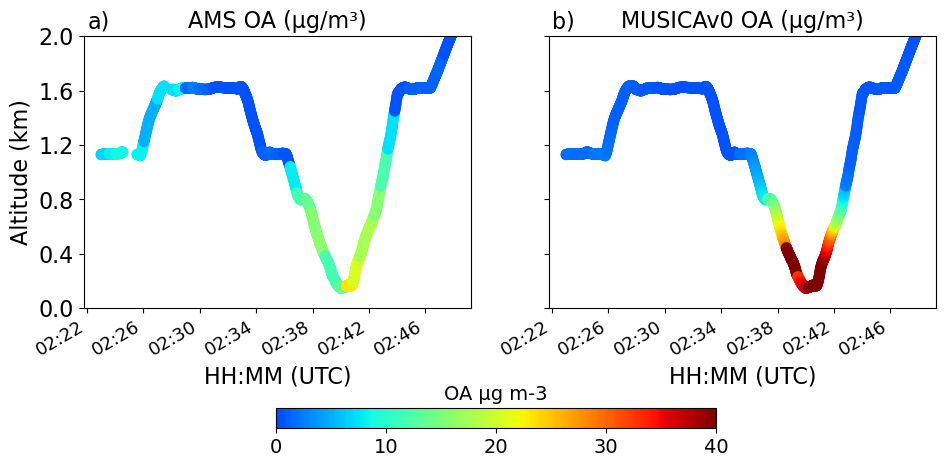

In [36]:
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator

fig = plt.figure(figsize=(11, 4))  # Adjust the figure size for better layout
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1],wspace=0.2)  # Define 1 row, 2 columns

pla_proj = ccrs.PlateCarree()
ax1 = fig.add_subplot(gs[0])
ax1.text(0.01, 1.01, f'a)', transform=ax1.transAxes,
            fontsize=16,  va='bottom', ha='left')

sc = ax1.scatter( p3data_xy['time'], p3data_xy['alt']/1000, c= p3data_xy['Org_Ave_IsoK_STP'], vmin=0, vmax=40.0, cmap=lighter_jet, s=50)
ax1.yaxis.set_major_locator(MaxNLocator(nbins=5))  # at most 5 ticks
plt.ylim(0,2)
plt.yticks(fontsize=16)
plt.xticks(fontsize=13, rotation=45)
plt.title('AMS OA (µg/m³)',fontsize=16)
plt.ylabel('Altitude (km)',fontsize=16)
plt.xlabel('HH:MM (UTC)',fontsize=16)

ax1.xaxis.set_major_locator(mdates.MinuteLocator(interval=4))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
fig.autofmt_xdate()

ax1 = fig.add_subplot(gs[1])
ax1.text(0.01, 1.01, f'b)', transform=ax1.transAxes,
            fontsize=16,  va='bottom', ha='left')
sc = ax1.scatter( musicav0data_xy['datetime'], musicav0data_xy['alt']/1000, c= musicav0data_xy['pom_mod'] + musicav0data_xy['soa_mod'], vmin=0, vmax=40.0, cmap=lighter_jet, s=50)


plt.ylim(0,2)
plt.title('MUSICAv0 OA (µg/m³)',fontsize=16)
#ax1.text(117, 5300, 'b)', fontsize=14, color='black')
plt.ylabel('Altitude (m)',fontsize=16, color='white')
plt.xlabel('HH:MM (UTC)',fontsize=16)
plt.yticks(fontsize=16, color='white')
plt.xticks(fontsize=13, rotation=45)

ax1.xaxis.set_major_locator(mdates.MinuteLocator(interval=4))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
fig.autofmt_xdate()
ax1.yaxis.set_major_locator(MaxNLocator(nbins=5))  # at most 5 ticks

cbar_ax = fig.add_axes([0.3, -.1, 0.4, 0.05])  # Adjust position as needed
cbar = plt.colorbar(sc, cax=cbar_ax, orientation='horizontal')
plt.title(f'OA \u00B5g m-3',fontsize=14)
cbar.ax.tick_params(labelsize=14)
# Show plot
plt.savefig(f'img/Figure15_AMSPaper.png',dpi=300, bbox_inches='tight')